In [4]:
pip install ultralytics

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [37]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from ultralytics import YOLO

Image resolution: 224 x 224
Class: 52.0, x_center: 0.069196, y_center: 0.165179, width: 0.058036, height: 0.303571
Drawing box at: (8, 3), width: 13.000064, height: 67.999904
Class: 52.0, x_center: 0.908482, y_center: 0.816964, width: 0.058036, height: 0.303571
Drawing box at: (196, 148), width: 13.000064, height: 67.999904


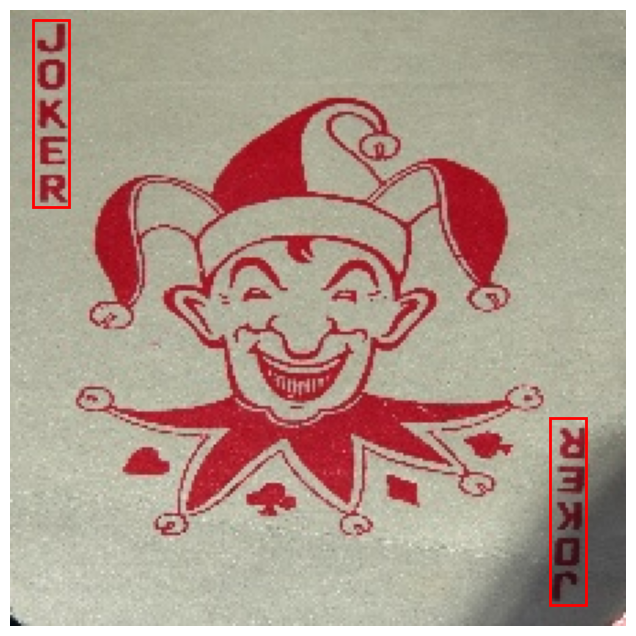

In [40]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def visualize_image_with_label(image_path, label_path):
    # Load image with OpenCV
    image = cv2.imread(image_path)
    
    if image is None:
        print("Error loading image. Check the image path.")
        return
    
    height, width, _ = image.shape
    print("Image resolution:", width, "x", height)

    # Read label file
    try:
        with open(label_path, 'r') as f:
            labels = f.readlines()
    except FileNotFoundError:
        print("Label file not found. Check the label path.")
        return

    # Plot image with matplotlib
    plt.figure(figsize=(8, 8))  # Set a larger figure size for better visibility
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    # Draw bounding boxes
    for label in labels:
        # Parse label
        class_idx, x_center, y_center, w, h = map(float, label.split())
        print(f"Class: {class_idx}, x_center: {x_center}, y_center: {y_center}, width: {w}, height: {h}")

        # Convert YOLO normalized coordinates back to image pixels
        x_center *= width
        y_center *= height
        w *= width
        h *= height

        # Calculate the bounding box's corner coordinates
        x1 = int(x_center - w / 2)
        y1 = int(y_center - h / 2)
        x2 = int(x_center + w / 2)
        y2 = int(y_center + h / 2)

        print(f"Drawing box at: ({x1}, {y1}), width: {w}, height: {h}")

        # Draw rectangle on plot
        plt.gca().add_patch(plt.Rectangle((x1, y1), w, h, edgecolor='red', facecolor='none', linewidth=2))
    
    # Display the plot
    plt.axis('off')  # Hide axes for cleaner look
    plt.show()  # Ensure that the plot is rendered in Jupyter

# Example usage
image_path = '1.jpg'
label_path = '1.txt'
visualize_image_with_label(image_path, label_path)


In [3]:
# Load the YOLOv8 model
model = YOLO('yolov8n.pt')  # You can use 'yolov8n.pt' for the nano version or a custom model

# Print the model architecture
print(model)

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [26]:
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO('yolov8n.pt')  # Or use 'last.pt' to resume directly

# Training setup
results = model.train(
    data='data.yaml',           # Dataset YAML file
    epochs=100,                 # Number of epochs
    imgsz=416,                  # Lower image resolution
    batch=8,                    # Reduced batch size
    workers=2,                  # Number of data workers
    device='mps',               # M1 GPU (or use 'cpu' or 'cuda')
    half=True,                  # Mixed precision (fp16)
    save=True,                  # Save checkpoints
    save_period=10,             # Save checkpoints every 10 epochs
    resume=False                # Set to True to resume training from last.pt
)

New https://pypi.org/project/ultralytics/8.3.20 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.19 🚀 Python-3.12.6 torch-2.5.0 CPU (Apple M1 Pro)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=416, save=True, save_period=10, cache=False, device=mps, workers=2, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=True, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=F

train: Scanning /Users/ram/Desktop/card-detection/datasets/train/labels.cache...
val: Scanning /Users/ram/Desktop/card-detection/datasets/valid/labels.cache... 9


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000175, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      1.636      5.152      1.039         27        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        948       3638      0.011      0.786     0.0333     0.0183

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G      1.164      3.787     0.8782         44        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        948       3638     0.0572      0.161     0.0669     0.0432

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G      1.042       3.16     0.8666         27        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.107      0.306      0.122     0.0879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100         0G      0.954      2.807     0.8563         34        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.164      0.418      0.193      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100         0G     0.9013      2.567     0.8493         35        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.206       0.48      0.254      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100         0G     0.8631      2.398     0.8433         46        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        948       3638       0.28      0.524      0.336      0.274

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         0G     0.8459      2.266     0.8422         45        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        948       3638      0.307      0.581      0.384      0.313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100         0G      0.825      2.136     0.8393         33        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.346      0.592       0.44      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100         0G     0.8066      2.022      0.835         43        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        948       3638      0.395      0.626      0.494      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100         0G     0.7884      1.917     0.8338         21        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        948       3638       0.42      0.684      0.539      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100         0G     0.7762      1.816     0.8321         34        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.503      0.692      0.626       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100         0G     0.7697      1.738     0.8307         36        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.541      0.721      0.661       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100         0G     0.7521      1.647      0.828         34        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.572      0.739      0.707      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100         0G     0.7401      1.578     0.8263         55        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        948       3638      0.636      0.746      0.746      0.636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100         0G     0.7434      1.508     0.8276         26        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638       0.68      0.788      0.796      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100         0G     0.7312      1.433     0.8272         30        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        948       3638      0.689      0.792      0.802       0.69

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100         0G     0.7217       1.38     0.8256         25        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.747        0.8      0.836      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100         0G     0.7123      1.325     0.8239         35        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.735      0.811       0.84       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100         0G     0.7059      1.283     0.8239         12        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638       0.77      0.829      0.857       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100         0G     0.7062      1.234     0.8216         32        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.788      0.851       0.88      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100         0G     0.6994      1.192     0.8221         45        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.796      0.855      0.891      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100         0G     0.6911      1.161     0.8222         28        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.804       0.86       0.89      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100         0G     0.6822      1.131     0.8185         34        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.813      0.862      0.899      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100         0G     0.6868      1.106     0.8221         44        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.807       0.86      0.901      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100         0G      0.677      1.081     0.8194         34        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.812      0.883      0.906      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100         0G     0.6733      1.045     0.8166         45        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638       0.83      0.884      0.915      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100         0G     0.6657      1.025     0.8175         37        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.838      0.894      0.923      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100         0G     0.6637      1.008     0.8165         48        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.849       0.89      0.931      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100         0G     0.6659     0.9948     0.8179         28        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.851      0.894      0.932      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100         0G     0.6565     0.9728      0.814         43        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.854      0.883      0.934      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100         0G     0.6486     0.9521     0.8145         29        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638       0.87      0.904      0.946      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100         0G     0.6494     0.9386     0.8138         43        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638       0.86      0.898      0.941      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100         0G     0.6429     0.9226     0.8126         48        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        948       3638       0.87      0.915      0.946      0.834

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100         0G     0.6451      0.906     0.8139         33        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.867      0.912      0.947      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100         0G     0.6417     0.8908     0.8145         21        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.875      0.913      0.949      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100         0G     0.6379      0.885     0.8129         44        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.887        0.9      0.953      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100         0G      0.631     0.8695     0.8117         25        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        948       3638      0.879      0.907      0.951      0.842

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100         0G     0.6324     0.8679     0.8108         33        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.883      0.923      0.954      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100         0G     0.6261     0.8414     0.8106         40        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.886      0.925      0.956      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100         0G     0.6315     0.8339     0.8136         34        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.885      0.929       0.96      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100         0G     0.6176     0.8185     0.8122         36        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638       0.88      0.923      0.958      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100         0G     0.6201     0.8176     0.8098         46        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.873      0.941      0.959      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100         0G     0.6156     0.8038     0.8094         40        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.877      0.932      0.957      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100         0G     0.6132     0.7973     0.8102         35        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.892      0.928      0.961      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100         0G     0.6108     0.7854     0.8089         29        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.887      0.931      0.959      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100         0G     0.6147     0.7821     0.8093         25        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.897      0.942      0.964      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100         0G     0.6171     0.7763     0.8101         39        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.896      0.935      0.965      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100         0G     0.6026     0.7647     0.8086         19        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.904      0.929      0.965      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100         0G     0.5995     0.7452     0.8078         22        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        948       3638      0.899      0.943      0.967      0.855

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100         0G     0.6002     0.7546     0.8072         29        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        948       3638      0.906      0.941      0.969       0.86

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100         0G     0.6036     0.7489     0.8073         32        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.911      0.923      0.966      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100         0G     0.5962      0.742     0.8074         36        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.897      0.946      0.966      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100         0G     0.5997     0.7372     0.8085         22        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.918      0.923      0.967      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100         0G     0.5944     0.7178     0.8083         57        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.905       0.94      0.967       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100         0G     0.5903     0.7186     0.8058         49        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.901      0.949      0.969      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100         0G     0.5967     0.7115     0.8078         19        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.906      0.944      0.969      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100         0G     0.5847     0.7081      0.806         45        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.907      0.949      0.971      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100         0G     0.5898     0.7116     0.8059         25        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.918      0.944      0.973      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100         0G     0.5862     0.6995     0.8056         49        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638       0.91      0.946      0.968      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100         0G     0.5851     0.6998     0.8082         20        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        948       3638      0.918      0.941       0.97      0.866

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100         0G     0.5849     0.6876     0.8073         31        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.918      0.939      0.969      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100         0G     0.5775     0.6822     0.8053         26        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.921      0.942       0.97      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100         0G     0.5755     0.6802     0.8039         28        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        948       3638      0.932      0.929      0.972      0.867

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100         0G     0.5796     0.6754     0.8052         35        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.913      0.947      0.972      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100         0G     0.5705     0.6607     0.8044         23        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638       0.92       0.94      0.971      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100         0G     0.5684     0.6606     0.8041         21        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.919      0.939      0.971      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100         0G     0.5765     0.6653     0.8041         33        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.921       0.95      0.972      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100         0G     0.5742     0.6654     0.8046         34        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.914      0.951      0.971      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100         0G     0.5684     0.6582     0.8038         34        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.918      0.948       0.97      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100         0G     0.5707     0.6564     0.8051         38        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.917      0.954      0.972       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100         0G     0.5688     0.6532     0.8031         37        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.918      0.954      0.973      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100         0G     0.5612     0.6397     0.8041         20        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.909      0.957      0.972      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100         0G     0.5695      0.644     0.8026         26        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.919      0.952      0.972      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100         0G      0.562     0.6326     0.8026         26        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.916      0.955      0.972      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100         0G     0.5616     0.6394     0.8033         18        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.924      0.943      0.972       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100         0G     0.5605     0.6269     0.8027         19        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        948       3638      0.922      0.947      0.973      0.872

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100         0G      0.561     0.6242     0.8044         18        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.919      0.952      0.975      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100         0G     0.5604     0.6274     0.8051         24        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.929      0.941      0.974      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100         0G     0.5606     0.6213     0.8024         39        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638       0.92      0.954      0.975      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100         0G     0.5547     0.6228     0.8038         27        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638       0.93      0.947      0.976      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100         0G     0.5566     0.6202     0.8027         27        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.928      0.948      0.975      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100         0G     0.5576     0.6165     0.8042         29        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.914      0.959      0.974      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100         0G     0.5552     0.6098     0.8025         41        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.932      0.943      0.974      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100         0G     0.5501      0.609     0.8009         44        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.912      0.957      0.973      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100         0G     0.5528     0.6092     0.8023         45        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.917       0.96      0.975      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100         0G     0.5503     0.6073     0.8014         34        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.931      0.952      0.975      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100         0G     0.5502     0.5983     0.8015         24        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.925       0.96      0.976      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100         0G     0.5542     0.6078     0.8011         32        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.925      0.961      0.976      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100         0G     0.5447     0.5973     0.8006         24        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.921       0.96      0.975      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100         0G     0.5483     0.5984     0.8025         26        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.922      0.961      0.974      0.876


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100         0G     0.4968     0.4835     0.7919         22        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.928      0.951      0.975      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100         0G     0.4879     0.4706     0.7917         21        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.924      0.961      0.974      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100         0G     0.4811     0.4702     0.7924         23        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.928      0.956      0.975      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100         0G      0.484     0.4717     0.7912         22        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.927      0.956      0.975      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100         0G     0.4816     0.4624     0.7906         24        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638       0.92      0.963      0.975      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100         0G     0.4791     0.4637     0.7914         22        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.923       0.96      0.975      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100         0G     0.4776     0.4562      0.791         22        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.926      0.956      0.975      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100         0G     0.4777     0.4554     0.7907         21        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.929      0.956      0.975      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100         0G     0.4775     0.4563     0.7911         24        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        948       3638      0.932      0.955      0.976      0.878

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100         0G     0.4725     0.4537     0.7918         23        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        948       3638      0.934      0.953      0.976      0.879



100 epochs completed in 18.437 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.19 🚀 Python-3.12.6 torch-2.5.0 CPU (Apple M1 Pro)
Model summary (fused): 168 layers, 3,015,983 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        948       3638      0.934      0.952      0.976      0.879
                   10c         38         61      0.954      0.902      0.981       0.86
                   10d         49         74      0.874      0.905       0.96      0.824
                   10h         45         71      0.927      0.958      0.975      0.848
                   10s         42         65      0.894      0.923      0.978      0.846
                    2c         47         72       0.94          1      0.994      0.923
                    2d         40         61      0.923      0.967      0.972      0.887
                    2h         42         59      0.984      0.966      0.992      0.927
                    2s         48         78          1       0.97      0.993      0.902
                    3c         48         70      0.958      0.978      0.993      0.924
                    3d         37         57      0.954      0.982      0.986      0.929
                    3

In [48]:
!pip3 install torchsummary

In [53]:
!pip3 install torch torchvision torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.8 MB/s eta 0:00:00a 0:00:01


In [6]:
import torch
print(torch.backends.mps.is_available())  # Should return True if MPS is available
print(torch.backends.mps.is_built())  # Should return True if PyTorch is built with MPS support


True
True


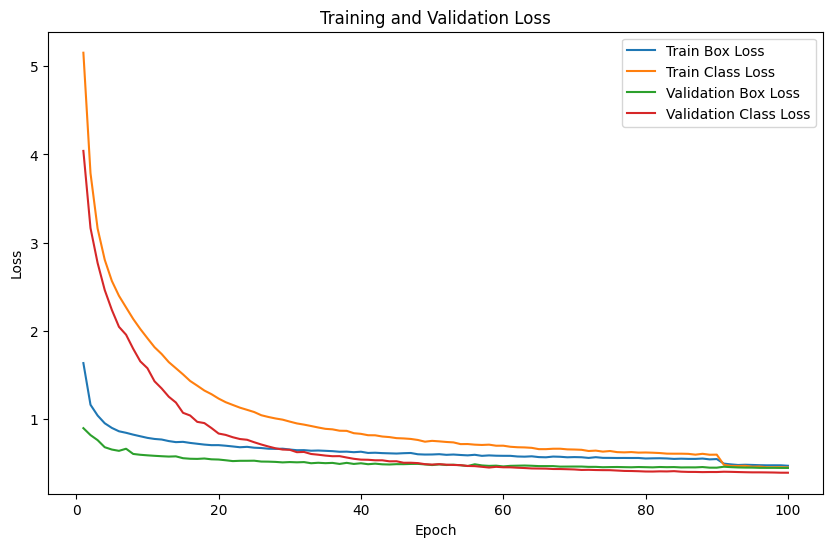

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the training results (replace with your own path)
results_path = 'runs/detect/train/results.csv'
results_df = pd.read_csv(results_path)

# Plot training loss and validation loss
plt.figure(figsize=(10, 6))
plt.plot(results_df['epoch'], results_df['train/box_loss'], label='Train Box Loss')
plt.plot(results_df['epoch'], results_df['train/cls_loss'], label='Train Class Loss')
plt.plot(results_df['epoch'], results_df['val/box_loss'], label='Validation Box Loss')
plt.plot(results_df['epoch'], results_df['val/cls_loss'], label='Validation Class Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [13]:
from ultralytics import YOLO

# Load the trained model
model = YOLO('runs/detect/train/weights/best.pt')

# Evaluate on the validation set
metrics = model.val()

# Print the evaluation results
print(metrics)

Ultralytics 8.3.23 🚀 Python-3.9.6 torch-2.5.0 CPU (Apple M1)
Model summary (fused): 168 layers, 3,015,983 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /Users/ram/Downloads/Project Review 3/datasets/valid/labels.cache... 948 images, 0 backgrounds, 0 corrupt: 100%|██████████| 948/948 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [01:22<00:00,  1.38s/it]


                   all        948       3638      0.934      0.952      0.976      0.879
                   10c         38         61      0.954      0.902      0.981       0.86
                   10d         49         74      0.874      0.905       0.96      0.824
                   10h         45         71      0.927      0.958      0.975      0.848
                   10s         42         65      0.894      0.923      0.978      0.846
                    2c         47         72       0.94          1      0.994      0.923
                    2d         40         61      0.923      0.967      0.972      0.887
                    2h         42         59      0.984      0.966      0.992      0.927
                    2s         48         78          1       0.97      0.993      0.902
                    3c         48         70      0.958      0.978      0.993      0.924
                    3d         37         57      0.954      0.982      0.986      0.929
                    3

In [15]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.pt")  # load an official model
model = YOLO("runs/detect/train/weights/best.pt")  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map  # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps  # a list contains map50-95 of each category

Ultralytics 8.3.23 🚀 Python-3.9.6 torch-2.5.0 CPU (Apple M1)
Model summary (fused): 168 layers, 3,015,983 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /Users/ram/Downloads/Project Review 3/datasets/valid/labels.cache... 948 images, 0 backgrounds, 0 corrupt: 100%|██████████| 948/948 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [01:18<00:00,  1.31s/it]


                   all        948       3638      0.934      0.952      0.976      0.879
                   10c         38         61      0.954      0.902      0.981       0.86
                   10d         49         74      0.874      0.905       0.96      0.824
                   10h         45         71      0.927      0.958      0.975      0.848
                   10s         42         65      0.894      0.923      0.978      0.846
                    2c         47         72       0.94          1      0.994      0.923
                    2d         40         61      0.923      0.967      0.972      0.887
                    2h         42         59      0.984      0.966      0.992      0.927
                    2s         48         78          1       0.97      0.993      0.902
                    3c         48         70      0.958      0.978      0.993      0.924
                    3d         37         57      0.954      0.982      0.986      0.929
                    3

array([    0.85979,     0.82434,     0.84766,     0.84621,     0.92278,     0.88678,     0.92677,      0.9023,     0.92425,     0.92938,     0.91451,      0.9245,     0.91454,     0.88561,     0.89093,     0.92267,     0.90393,     0.91242,     0.89607,      0.9037,      0.9132,     0.89933,     0.93512,     0.90356,
           0.93546,     0.92418,     0.91797,     0.90929,     0.83846,     0.83375,     0.79362,     0.84167,     0.92763,     0.91184,     0.90428,     0.92706,     0.79495,     0.83099,     0.77929,     0.84935,     0.90483,     0.84854,     0.83406,     0.89578,      0.9233,     0.88989,     0.89862,     0.91986,
           0.90648,     0.82162,     0.90732,     0.90927,     0.41083])

In [16]:
from ultralytics import YOLO

# Load the trained model
model = YOLO("runs/detect/train/weights/best.pt")  # Load your custom trained model

# Path to the data.yaml file
data_path = "data.yaml"  # Replace with the actual path to your data.yaml file

# Evaluate the model on the test dataset specified in data.yaml
metrics = model.val(data=data_path, split='test')  # Set split='test' to use the test dataset


Ultralytics 8.3.23 🚀 Python-3.9.6 torch-2.5.0 CPU (Apple M1)
Model summary (fused): 168 layers, 3,015,983 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /Users/ram/Downloads/Project Review 3/datasets/test/labels.cache... 837 images, 0 backgrounds, 0 corrupt: 100%|██████████| 837/837 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [01:10<00:00,  1.34s/it]


                   all        837       3192      0.934      0.955      0.975      0.882
                   10c         39         64      0.884       0.95      0.958      0.813
                   10d         43         75       0.96      0.987      0.992      0.853
                   10h         41         59      0.931      0.983      0.986      0.864
                   10s         39         61      0.878      0.902      0.965      0.836
                    2c         33         50      0.942          1      0.995      0.914
                    2d         41         58      0.894      0.948      0.986      0.912
                    2h         35         54      0.895      0.945      0.983      0.904
                    2s         47         74          1      0.979      0.995      0.925
                    3c         39         62      0.996      0.968      0.993      0.918
                    3d         40         61      0.947      0.967      0.987      0.907
                    3

In [17]:
# Plot to check overfitting
plt.figure(figsize=(10, 6))
plt.plot(results_df['epoch'], results_df['train/box_loss'], label='Train Box Loss')
plt.plot(results_df['epoch'], results_df['val/box_loss'], label='Validation Box Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Box Loss')
plt.legend()
plt.show()

train_loss = results_df['train/box_loss'].iloc[-1]
val_loss = results_df['val/box_loss'].iloc[-1]
print(f"Final Train Loss: {train_loss}, Final Validation Loss: {val_loss}")

if val_loss > train_loss:
    print("Model may be overfitting.")


<Figure size 1000x600 with 1 Axes>

Final Train Loss: 0.47249, Final Validation Loss: 0.44786


In [18]:
# Check if the model is underfitting by analyzing the mAP (mean Average Precision)
mAP50 = results_df['metrics/mAP50(B)'].iloc[-1]
mAP50_95 = results_df['metrics/mAP50-95(B)'].iloc[-1]

print(f"mAP@50: {mAP50}, mAP@50-95: {mAP50_95}")

if mAP50 < 0.5:
    print("The model might be underfitting. Consider increasing the number of epochs or tuning hyperparameters.")
else:
    print("The model is performing well in terms of mAP@50.")


mAP@50: 0.97565, mAP@50-95: 0.87886
The model is performing well in terms of mAP@50.


In [19]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the trained model
model = YOLO('runs/detect/train/weights/best.pt')

# Define test set path
test_images_path = 'datasets/test/images'
test_labels_path = 'datasets/test/labels'

# 1. Test Model on Test Dataset
results = model.val(data='data.yaml', save_json=True)

Ultralytics 8.3.23 🚀 Python-3.9.6 torch-2.5.0 CPU (Apple M1)
Model summary (fused): 168 layers, 3,015,983 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /Users/ram/Downloads/Project Review 3/datasets/valid/labels.cache... 948 images, 0 backgrounds, 0 corrupt: 100%|██████████| 948/948 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [01:22<00:00,  1.38s/it]


                   all        948       3638      0.934      0.952      0.976      0.879
                   10c         38         61      0.954      0.902      0.981       0.86
                   10d         49         74      0.874      0.905       0.96      0.824
                   10h         45         71      0.927      0.958      0.975      0.848
                   10s         42         65      0.894      0.923      0.978      0.846
                    2c         47         72       0.94          1      0.994      0.923
                    2d         40         61      0.923      0.967      0.972      0.887
                    2h         42         59      0.984      0.966      0.992      0.927
                    2s         48         78          1       0.97      0.993      0.902
                    3c         48         70      0.958      0.978      0.993      0.924
                    3d         37         57      0.954      0.982      0.986      0.929
                    3

# Detect Images

In [2]:
from ultralytics import YOLO

# Load the trained model
model = YOLO('runs/detect/train/weights/best.pt')

results = model(["testimage1.jpg", "testimage2.jpg", "testimage3.webp", "testimage4.jpg"])  # predict on an image


0: 416x416 1 As, 2 Kds, 1 Ks, 2 Qcs, 19.2ms
1: 416x416 1 10h, 1 Ah, 1 Jh, 1 Kd, 1 Qh, 19.2ms
2: 416x416 2 4ss, 3 Jss, 2 Kss, 1 Qs, 19.2ms
3: 416x416 2 JKs, 19.2ms
Speed: 1.5ms preprocess, 19.2ms inference, 0.4ms postprocess per image at shape (1, 3, 416, 416)


In [3]:
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    result.save(filename="result.jpg")  # save to disk

# Video File

In [ ]:
import cv2
from ultralytics import YOLO

model = YOLO("runs/detect/train/weights/best.pt") 

input_video = "input_video.mp4" 
output_video = "processed_video.mp4"  

cap = cv2.VideoCapture(input_video)
if not cap.isOpened():
    print("Error: Unable to open the video file.")
    exit()

frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video, fourcc, fps, (frame_width, frame_height))

print("Processing video...")
try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("End of video file.")
            break

        results = model.predict(source=frame, conf=0.5, show=False)

        annotated_frame = results[0].plot()

        out.write(annotated_frame)

        cv2.imshow("Processed Video", annotated_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            print("Processing interrupted by user.")
            break

except Exception as e:
    print(f"An error occurred: {e}")

finally:
    cap.release()
    out.release()
    cv2.destroyAllWindows()
    print(f"Processed video saved to {output_video}")

# Live Feed

In [4]:
import cv2
from ultralytics import YOLO

model = YOLO("runs/detect/train/weights/best.pt")

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error: Unable to access the camera.")
    exit()

output_file = "live_feed_output.mp4"
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
target_fps = 10  
frame_interval = int(fps / target_fps)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_file, fourcc, target_fps, (frame_width, frame_height))

print("Press 'q' to quit.")
frame_count = 0

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Unable to read frame from camera.")
            break

        if frame_count % frame_interval == 0:
            results = model.predict(source=frame, conf=0.5, show=False)

            annotated_frame = results[0].plot()

            cv2.imshow("Live Feed - Object Detection", annotated_frame)

            out.write(annotated_frame)

        frame_count += 1

        # Exit if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

except KeyboardInterrupt:
    print("Live feed stopped manually.")

finally:
    cap.release()
    out.release()
    cv2.destroyAllWindows()
    print(f"Live feed saved to {output_file}")


Press 'q' to quit.

0: 256x416 (no detections), 23.6ms
Speed: 10.2ms preprocess, 23.6ms inference, 0.3ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 (no detections), 38.3ms
Speed: 1.1ms preprocess, 38.3ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 (no detections), 31.2ms
Speed: 1.0ms preprocess, 31.2ms inference, 0.3ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 (no detections), 19.3ms
Speed: 0.9ms preprocess, 19.3ms inference, 0.5ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 (no detections), 26.0ms
Speed: 0.9ms preprocess, 26.0ms inference, 0.3ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 (no detections), 24.4ms
Speed: 1.0ms preprocess, 24.4ms inference, 0.3ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 (no detections), 28.9ms
Speed: 2.3ms preprocess, 28.9ms inference, 0.2ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 (no detections), 39.3ms
Speed: 1.3ms 